## AutoGrad

In [81]:
import torch

#### Simple gradient calculation

In [85]:
x = torch.tensor([2], dtype=torch.float32, requires_grad=True)
y = x**3

y.backward() # compute derivative : 3x^2
print(f"Gradient at first: {x.grad}") # 12

y = x**3
y.backward()
print(f"Without reseting the gradient: {x.grad}") # 24 gradient will accumulate

# gradient reset
x.grad.zero_() # this will make gradient 0

y = x**3
y.backward() # calculate gradient]
print(f"After clearing gradient: {x.grad}") # 12

Gradient at first: tensor([12.])
Without reseting the gradient: tensor([24.])
After clearing gradient: tensor([12.])


#### Chain Rule

In [86]:
x = torch.tensor([1], dtype=torch.float32, requires_grad=True)
y = x**2
z = y

z.backward() # dz/dx = dz/dy * dy/dx = 1 * 2x = 2x = 2
print(f"Derivative of z wrt x: {x.grad}")

Derivative of z wrt x: tensor([2.])


#### Partial Derivative

In [101]:
x = torch.tensor([1,2,3], dtype=torch.float32, requires_grad=True)
y = x**2 # y = x1**2 , x2**2, x3 **2

y

tensor([1., 4., 9.], grad_fn=<PowBackward0>)

In [102]:
z = y.mean() # z = (x1**2 + x2**2, x3**2) / 3

In [103]:
z

tensor(4.6667, grad_fn=<MeanBackward0>)

In [104]:
z.backward()

In [105]:
for i, x in enumerate(x.grad):
    print(f"Derivative of z wrt x{i + 1} : {x}")

Derivative of z wrt x1 : 0.6666666865348816
Derivative of z wrt x2 : 1.3333333730697632
Derivative of z wrt x3 : 2.0


In this way we can calculate the gradient using the pytorch autograd method and is useful in training the model in machine learning

## Doing it from scratch

In [1]:
def dy_dx(x):
    return 2 * x # for y = x^2

In [2]:
dy_dx(3)

6

In [3]:
import math

def dz_dx(x): # chaining dz/dx = dz/dy * dy/dx = cos(y) * 2x = cos(x^2) * 2x
    return 2 * x * math.cos(x**2) # for z = sin(y)

In [4]:
dz_dx(3)

-5.466781571308061

So the complexities increase when the chain rule is large for multiple variable.

## A simple Neural Network

In [5]:
original_data = {
    "cgpa": [3.0, 3.5, 4.0, 4.5, 5.0, 9.0, 9.5, 4.1, 6.5],
    "salary": [25000, 40000, 38000, 50000, 50000, 100000, 101000, 36000, 60000]
}

### Training Process
- **Forward Progagation** : Compute the outpu tof the network given an input.
- **Calculate Loss** : Calculate the loss function to quantify the error.
- **Backward Propagation** : Compute gradients of the loss wit h respect to the parameters involved.
- **Update Gradients**: Adjust the parameters using an optimization algorithm like gradient descent.

#### Normalization
$$
x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

In [6]:
# Normalize the data
def normalize(data):
    for key in data:
        data[key] = [(value - min(data[key])) / (max(data[key]) - min(data[key])) for value in data[key]]

In [7]:
data = original_data.copy()
normalize(data)

In [8]:
data["cgpa"][:5]

[0.0,
 0.07692307692307693,
 0.15384615384615385,
 0.23076923076923078,
 0.3076923076923077]

In [9]:
x = data["cgpa"]
y = data["salary"]

#### Parameter
Initilaizing random parameter for our network first

In [10]:
import random

weight = random.uniform(0, 1)
bias = random.uniform(0, 1)
learning_rate = 0.1

#### Activation function
Using linear activation function for regression

In [11]:
def linear(x):
    return x

#### loss function
MSE for regression algorithm

In [12]:
def mse(y_true, y_pred):
    error = (y_true - y_pred)**2
    return error

#### Backprop
backpropagation and gradient descent

In [13]:
def gradient(y_true: int, y_pred: int, x: int): # dE/dw = -2(y - y_pred) * x
    d_error = - 2 * (y_true - y_pred)
    grad_x = d_error * x
    grad_bias = d_error # dE/db = -2(y - y_pred)
    # returning the gradient for the data point
    return grad_x, grad_bias

## Custom training

In [14]:
EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(x)): # training loop for each data point

        # forward propagation
        y_hat = linear(x[i] * weight + bias)
        
        # error calculation (loss of model)
        loss = mse(y[i], y_hat)
        total_loss = total_loss + loss # total loss of model
        
        # Backward pass (Gradient Descent)
        del_x, del_bias = gradient(y[i], y_hat, x[i])
        
        # Update the weights and bias
        new_weight = weight - learning_rate * del_x
        new_bias = bias - learning_rate * del_bias
        
        weight = new_weight
        bias = new_bias
        
    if epoch % 1 == 0 or epoch == EPOCHS - 1:
        print(f"Epoch: {epoch + 1}, Loss: {total_loss}")

Epoch: 1, Loss: 0.29624992411668993
Epoch: 2, Loss: 0.08353300266716554
Epoch: 3, Loss: 0.06889527619893038
Epoch: 4, Loss: 0.06004100176733607
Epoch: 5, Loss: 0.053826068012487044
Epoch: 6, Loss: 0.04942215959779458
Epoch: 7, Loss: 0.046277526373982955
Epoch: 8, Loss: 0.04401265938987557
Epoch: 9, Loss: 0.042366298143812514
Epoch: 10, Loss: 0.04115795252812685


#### Denormalize
Get back the scale of data from 0 to 1 to original scale

In [15]:
original_data

{'cgpa': [3.0, 3.5, 4.0, 4.5, 5.0, 9.0, 9.5, 4.1, 6.5],
 'salary': [25000, 40000, 38000, 50000, 50000, 100000, 101000, 36000, 60000]}

In [16]:
def denormalize(value):
    max_value = max(original_data["salary"])
    min_value = min(original_data["salary"])
    
    return value * (max_value - min_value) + min_value

In [17]:
denormalize(0.2), denormalize(0), denormalize(1), denormalize(0.5)

(40200.0, 25000, 101000, 63000.0)

In [18]:
predictions = [denormalize(linear(weight * x + bias)) for x in data["cgpa"]]

In [19]:
for y, y_pred in zip(original_data["salary"], predictions):
    print(f"Actual: {y}, Predicted: {y_pred}")

Actual: 25000, Predicted: 28139.407133957036
Actual: 40000, Predicted: 33457.167214738205
Actual: 38000, Predicted: 38774.92729551937
Actual: 50000, Predicted: 44092.68737630053
Actual: 50000, Predicted: 49410.4474570817
Actual: 100000, Predicted: 91952.52810333103
Actual: 101000, Predicted: 97270.28818411219
Actual: 36000, Predicted: 39838.4793116756
Actual: 60000, Predicted: 65363.72769942519


## Using autograd to calculate gradients

In [20]:
import torch

x = torch.tensor(3.0, requires_grad=True) # we want to calculate derivative of this tensor
x

tensor(3., requires_grad=True)

In [21]:
y = x**2
y # build a computation graph for this because x has require grad

tensor(9., grad_fn=<PowBackward0>)

In [22]:
# now we can calculate derivate with this gradient function in y
y.backward() # dy/dx = 2x

In [23]:
x.grad # see the gradient

tensor(6.)

In [24]:
# more complex chain differentiation rule
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
z = torch.sin(y)

x, y, z

(tensor(3., requires_grad=True),
 tensor(9., grad_fn=<PowBackward0>),
 tensor(0.4121, grad_fn=<SinBackward0>))

In [25]:
# y.backward() # dy_dx = 2x # cannot do this because we will be doing for z so for intermediate node cannot calculate gradient

In [26]:
z.backward() # dz_dx = dz_dy * dy_dx = cos(y) * 2x = cos(x**2) * 2x # also second time cannot compute gradient

In [27]:
x.grad

tensor(-5.4668)

## Training our Regression Model with AutoGrad

In [28]:
weight = torch.tensor(random.uniform(0, 1), requires_grad=True)
bias = torch.tensor(random.uniform(0, 1), requires_grad=True)
learning_rate = 0.1

weight, bias

(tensor(0.6873, requires_grad=True), tensor(0.9303, requires_grad=True))

In [29]:
x = torch.tensor(data["cgpa"], dtype=torch.float32, requires_grad=False)
y = torch.tensor(data["salary"], dtype=torch.float32, requires_grad=False)

x, y

(tensor([0.0000, 0.0769, 0.1538, 0.2308, 0.3077, 0.9231, 1.0000, 0.1692, 0.5385]),
 tensor([0.0000, 0.1974, 0.1711, 0.3289, 0.3289, 0.9868, 1.0000, 0.1447, 0.4605]))

In [30]:
class LinearRegressionModel:
    def __init__(self):
        self.weight = torch.tensor(random.uniform(0, 1), requires_grad=True)
        self.bias = torch.tensor(random.uniform(0, 1), requires_grad=True)
        
    def forward(self, x):
        return x * self.weight + self.bias

#### Inheriting from torch.nn.Module
- We get automatic management of gradients, parameters, layers
- Gives access to helpful methods such as .parameters(), .train(), .eval() etc.
- Automatic handling zero gradients with optimizer.zero_grad()

In [31]:
model = LinearRegressionModel()
model.__dict__

{'weight': tensor(0.9140, requires_grad=True),
 'bias': tensor(0.7363, requires_grad=True)}

In [32]:
mse = torch.nn.MSELoss()

In [33]:
y_pred = model.forward(x[0])
y_pred

tensor(0.7363, grad_fn=<AddBackward0>)

In [34]:
y_true = y[0]
y_true

tensor(0.)

In [35]:
loss = mse(y_true, y_pred)

loss

tensor(0.5422, grad_fn=<MseLossBackward0>)

In [36]:
loss.backward() # dE/dw, dE/db

In [37]:
model.weight.grad, model.bias.grad

(tensor(0.), tensor(1.4726))

In [38]:
model.weight.data

tensor(0.9140)

In [39]:
# update the weight and bias with gradient descent
model.weight.data = model.weight.data - learning_rate * model.weight.grad
model.bias.data = model.bias.data - learning_rate * model.bias.grad

In [40]:
# clear the gradient after update
model.weight.grad.zero_()
model.bias.grad.zero_()

tensor(0.)

In [41]:
model.weight.item(), model.bias.item() # new updated weight

(0.9140182137489319, 0.589059591293335)

In [42]:
model.weight.grad, model.bias.grad

(tensor(0.), tensor(0.))

## Pytorch training with custom optimizer but auto grad

In [43]:
EPOCHS = 10
LEARNING_RATE = 0.1

model = LinearRegressionModel() # our own class of linear regression

for epoch in range(EPOCHS):
    total_loss = 0
    
    for i in range(len(x)):
        # forwrard propagation
        y_pred = model.forward(x[i])
        y_true = y[i]
        # loss calculation
        loss = mse(y_true, y_pred)
        total_loss = total_loss + loss
        
        # backward propagation
        loss.backward() # calculate gradient for dloss/dweight, dloss/dbias
        
        # gradient descent
        with torch.no_grad(): # donot track gradient for this update
            model.weight.data = model.weight.data - LEARNING_RATE * model.weight.grad
            model.bias.data = model.bias.data - LEARNING_RATE * model.bias.grad
            
        # reset the gradient to zero for next data point
        model.weight.grad.zero_()
        model.bias.grad.zero_()
        
    # track the training progress per epoch
    print(f"Epoch: {epoch + 1} with total loss: {total_loss:.2f}")

Epoch: 1 with total loss: 1.94
Epoch: 2 with total loss: 0.21
Epoch: 3 with total loss: 0.14
Epoch: 4 with total loss: 0.11
Epoch: 5 with total loss: 0.09
Epoch: 6 with total loss: 0.07
Epoch: 7 with total loss: 0.06
Epoch: 8 with total loss: 0.06
Epoch: 9 with total loss: 0.05
Epoch: 10 with total loss: 0.05


In [44]:
# predict with the trained model
predictions = model.forward(x[5])
predictions

tensor(0.8712, grad_fn=<AddBackward0>)

In [45]:
denormalize(predictions.item())

91212.03088760376

## With Pytorch Full Loop Training

In [46]:
import torch

class LinearRegressionModel2(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel2, self).__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        return self.linear(x)

In [47]:
model2 = LinearRegressionModel2()

In [48]:
model2.__dict__

{'training': True,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {'linear': Linear(in_features=1, out_features=1, bias=True)}}

In [49]:
model2.linear.weight, model2.linear.bias

(Parameter containing:
 tensor([[-0.1081]], requires_grad=True),
 Parameter containing:
 tensor([-0.0252], requires_grad=True))

In [50]:
[p for p in model2.parameters()]

[Parameter containing:
 tensor([[-0.1081]], requires_grad=True),
 Parameter containing:
 tensor([-0.0252], requires_grad=True)]

In [51]:
x, y

(tensor([0.0000, 0.0769, 0.1538, 0.2308, 0.3077, 0.9231, 1.0000, 0.1692, 0.5385]),
 tensor([0.0000, 0.1974, 0.1711, 0.3289, 0.3289, 0.9868, 1.0000, 0.1447, 0.4605]))

In [52]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [53]:
x[0], x[0].unsqueeze(dim=0)

(tensor(0.), tensor([0.]))

In [54]:
y_pred = model2(x[0].unsqueeze(0))

y_pred

tensor([-0.0252], grad_fn=<ViewBackward0>)

In [55]:
for epoch in range(EPOCHS):
    total_loss = 0
    
    for i in range(len(x)):
        model2.train() # set the model to train mode
        
        # forward step
        y_pred = model2(x[i].unsqueeze(dim=0))
        loss = criterion(y_pred, y[i].unsqueeze(dim=0))

        total_loss += loss.item()
        
        # backward step
        loss.backward() # dl(mse)/d(weight), dl(mse).d(bias) : gradient of the model
        
        # optimization step
        optimizer.step() # update the weight and bias SGD with learning rate 0.1
        
        # zero the gradient
        optimizer.zero_grad() # reset the gradient for another data
        
    print(f"Epoch: {epoch + 1} | Loss: {total_loss:.2f}")

Epoch: 1 | Loss: 1.45
Epoch: 2 | Loss: 0.73
Epoch: 3 | Loss: 0.53
Epoch: 4 | Loss: 0.38
Epoch: 5 | Loss: 0.27
Epoch: 6 | Loss: 0.20
Epoch: 7 | Loss: 0.15
Epoch: 8 | Loss: 0.12
Epoch: 9 | Loss: 0.09
Epoch: 10 | Loss: 0.08


In [61]:
new_weight = model2.linear.weight.item()
new_bias = model2.linear.bias.item()

print(f"New Weight: {new_weight: .2f} and New Bias: {new_bias: .2f} after training for {EPOCHS} with SGD and learning rate 0.1")

New Weight:  0.81 and New Bias:  0.09 after training for 10 with SGD and learning rate 0.1


In [68]:
x_list = x.tolist()
y_list = y.tolist()

In [69]:
import matplotlib.pyplot as plt

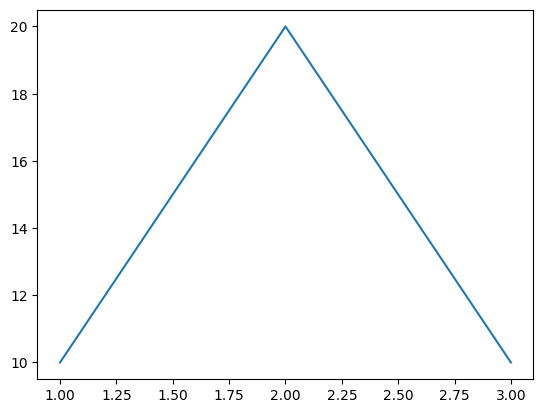

In [74]:
plt.plot([1,2,3],[10,20,10])

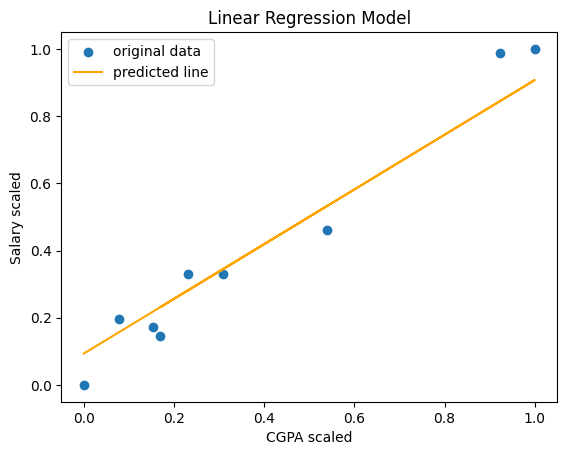

In [80]:
slope = new_weight
bias = new_bias

plt.scatter(x_list, y_list, label="original data")
plt.plot(x_list, [slope * x + bias for x in x_list], color="orange", label="predicted line")
plt.legend()
plt.title("Linear Regression Model")
plt.xlabel("CGPA scaled")
plt.ylabel("Salary scaled")
plt.show()